In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Loading data

In [2]:
df_attack = pd.read_excel('cyber_attack_classification.xlsx', sheet_name='Attack Sample')
df_normal = pd.read_excel('cyber_attack_classification.xlsx', sheet_name='Normal operation')
print(df_attack.shape)
print(df_normal.shape)

(500, 2)
(500, 2)


One-hot encoding

In [3]:
# One hot encoding the attack and normal data by creating new column Y
df_attack['Y'] = 1
df_normal['Y'] = 0

# Concatenating both dataframes
df_all = pd.concat([df_normal,df_attack], ignore_index=True)

#  Separate into input and output dataframes
Model_output = df_all[['Y']]
Model_input = df_all[['CA','T']]

Data preprocessing

In [4]:
# Normalizing input data using Min-Max normalization
scaler = MinMaxScaler()
Model_input_normalized_data = scaler.fit_transform(Model_input)
# Ensuring normalized data is a dataframe
Model_input_normalized = pd.DataFrame(Model_input_normalized_data, columns=Model_input.columns)

# Splitting for test set
X_train, X_test, y_train, y_test = train_test_split(Model_input_normalized, Model_output, test_size= 0.2, random_state= 42, stratify= Model_output)
# Splitting for train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.25, random_state= 42, stratify= y_train)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(600, 2)
(200, 2)
(200, 2)


Decision boundary plotting function

In [5]:
# Function to plot decision boundary
def plot_decision_boundary(ax, X, y, title, model):
    X_original = scaler.inverse_transform(X)
    
    # Ensure y is a NumPy array
    y = np.ravel(y)
    
    # Extract points with labels 0 and 1
    X_0 = X_original[y == 0]
    X_1 = X_original[y == 1]

    # Create a 2D grid for plotting the decision boundary
    x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
    y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Predict classification for grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_normalized = scaler.transform(grid_points)
    Z = model.decision_function(grid_points_normalized).reshape(xx.shape)

    # Plot the original test data 
    ax.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Normal', alpha=0.7)
    ax.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Attack', alpha=0.7)

    # Plot the decision boundary
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--')
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red'], extend='both')

    #nAdd labels and legends
    ax.set_title(title)
    ax.set_xlabel("CA (Original Scale)")
    ax.set_ylabel("T (Original Scale)")
    ax.legend()
    ax.grid(True)

Model selection

c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy using linear: Test=0.6550, Validation=0.6350


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


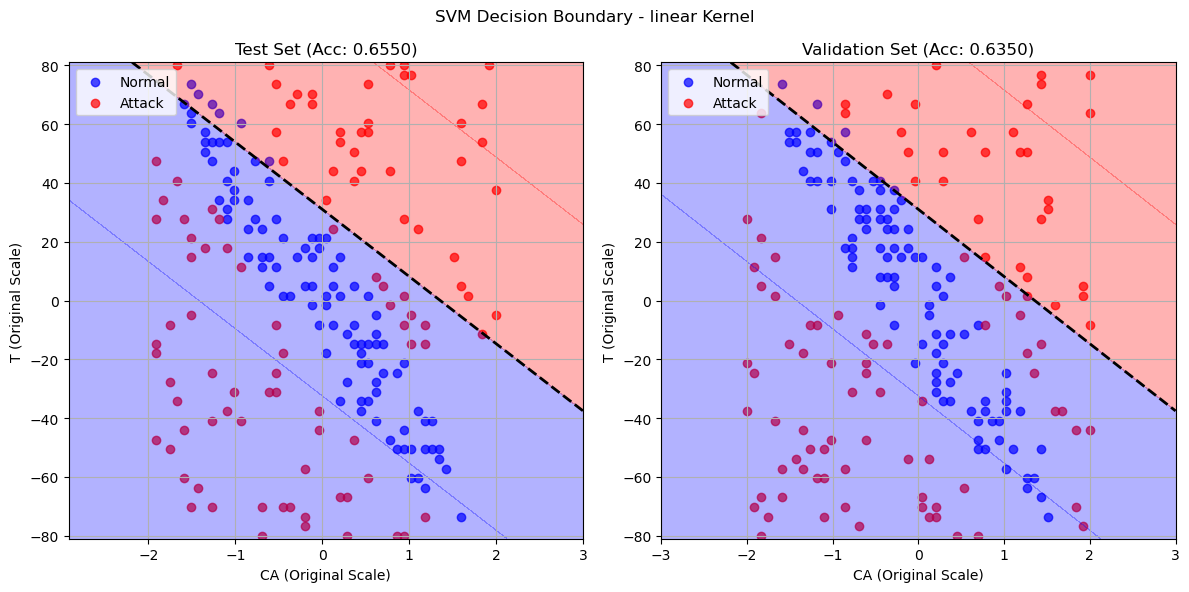

c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy using poly: Test=0.6550, Validation=0.6800


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


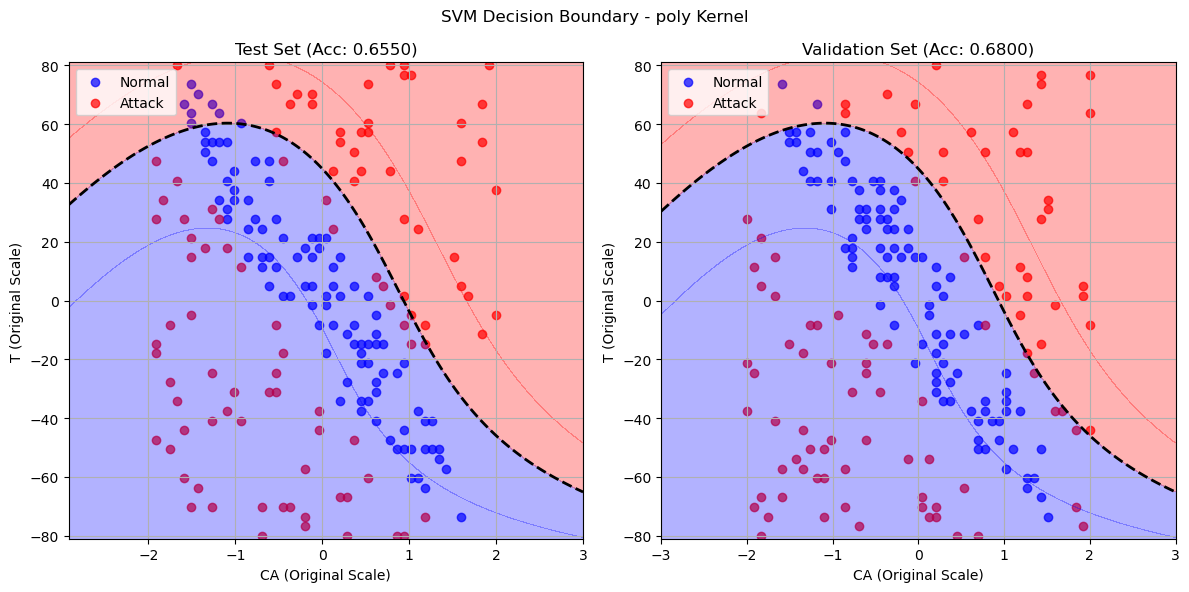

c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy using rbf: Test=0.9250, Validation=0.9600


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


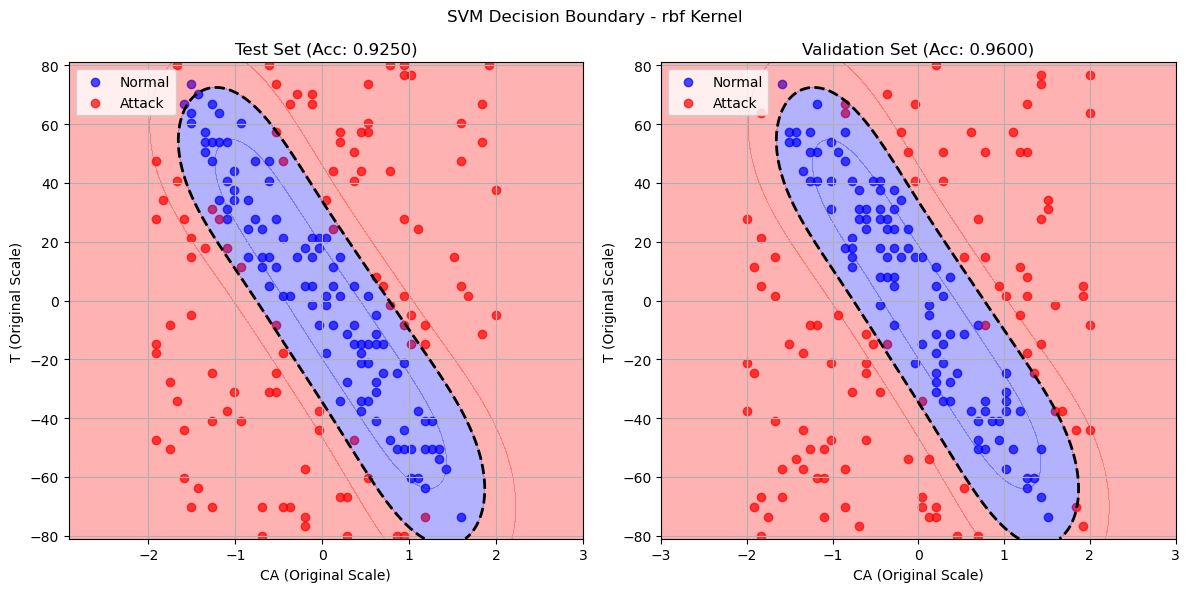

c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy using sigmoid: Test=0.5400, Validation=0.5450


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


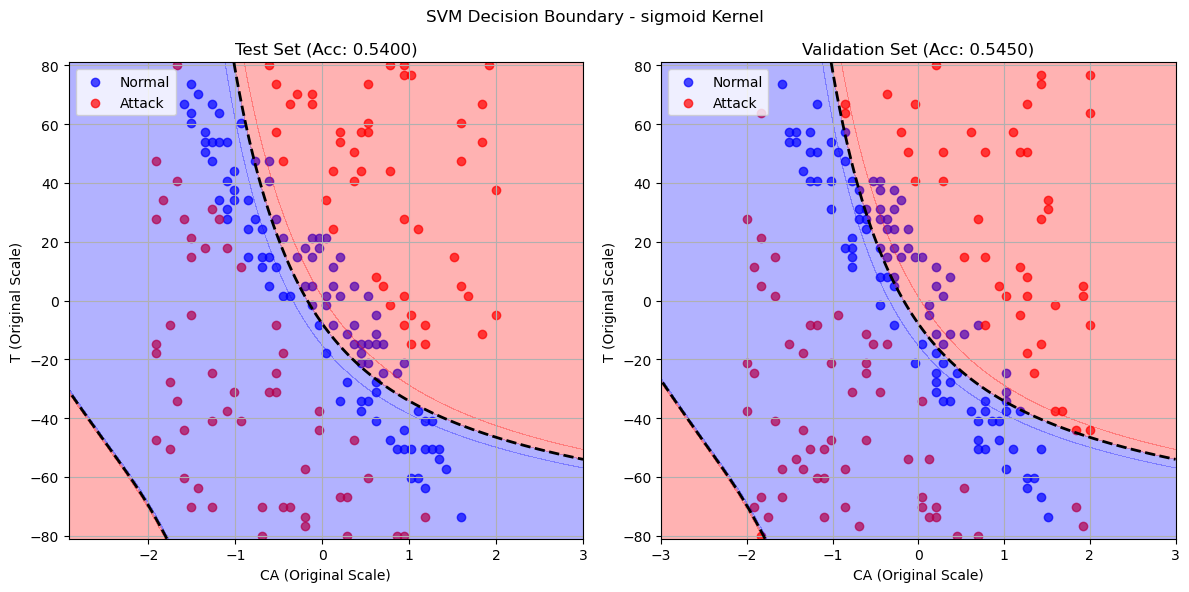

In [6]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    
    # Predict on test and validation sets
    pred_test = model.predict(X_test)
    pred_val = model.predict(X_val)
    
    # Compute accuracy
    test_accuracy = accuracy_score(y_test, pred_test)
    val_accuracy = accuracy_score(y_val, pred_val)
    
    print(f'Accuracy using {kernel}: Test={test_accuracy:.4f}, Validation={val_accuracy:.4f}')
    
    # Create subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Side-by-side subplots

    # Plot test set decision boundary
    plot_decision_boundary(axes[0], X_test, y_test, f"Test Set (Acc: {test_accuracy:.4f})", model)

    # Plot validation set decision boundary
    plot_decision_boundary(axes[1], X_val, y_val, f"Validation Set (Acc: {val_accuracy:.4f})", model)

    # Main title
    plt.suptitle(f"SVM Decision Boundary - {kernel} Kernel")
    plt.tight_layout()
    plt.show()

Hyperparameter tuning for RBF kernel

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 10000, 'gamma': 1}
Final RBF SVM Accuracy: Test=1.0000, Validation=1.0000


c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Max\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


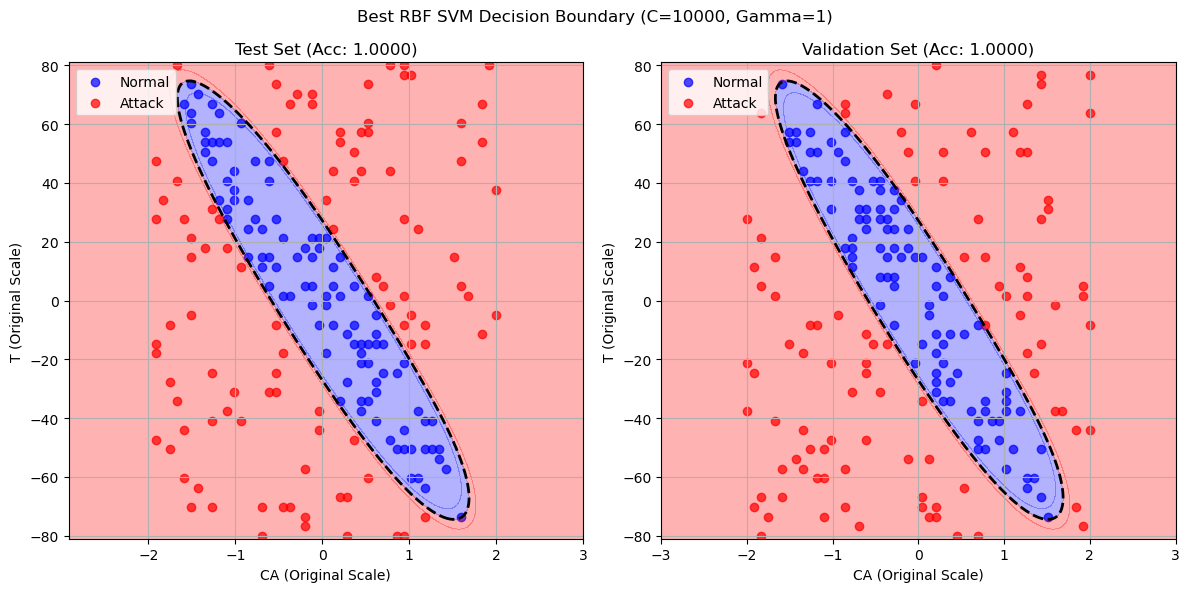

In [ ]:
# Define hyperparameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],         
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]   
}

# Initialize RBF SVM model
svm_rbf = SVC(kernel='rbf')

# Perform GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model using best parameters
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)

# Predict on test and validation sets
pred_test = best_svm.predict(X_test)
pred_val = best_svm.predict(X_val)

# Compute accuracy
test_accuracy = accuracy_score(y_test, pred_test)
val_accuracy = accuracy_score(y_val, pred_val)

print(f"Final RBF SVM Accuracy: Test={test_accuracy:.4f}, Validation={val_accuracy:.4f}")

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Side-by-side subplots

# Plot test set decision boundary
plot_decision_boundary(axes[0], X_test, y_test, f"Test Set (Acc: {test_accuracy:.4f})", best_svm)

# Plot validation set decision boundary
plot_decision_boundary(axes[1], X_val, y_val, f"Validation Set (Acc: {val_accuracy:.4f})", best_svm)

plt.suptitle(f"Best RBF SVM Decision Boundary (C={best_params['C']}, Gamma={best_params['gamma']})")
plt.tight_layout()
plt.show()